<center><h1> South German Credit </h1></center

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('SouthGermanCredit.asc', sep=' ')
data.columns = ['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


# Model Evaluation

Following the Confusion Matrix, we provide a table displaying various model evaluation metrics, including precision, recall, f1-score, and support, as detailed below:

In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.76      0.79      0.78       141

    accuracy                           0.78       292
   macro avg       0.78      0.78      0.78       292
weighted avg       0.78      0.78      0.78       292



In [9]:
model_roc_auc = roc_auc_score(y_test, model_log.predict(X_test))
model_roc_auc

0.7779578225541308

Additionally, we calculated the Area Under the Curve (AUC) for the ROC curve, and the resulting value is approximately 0.77. We have also created a graphical representation of the ROC curve.

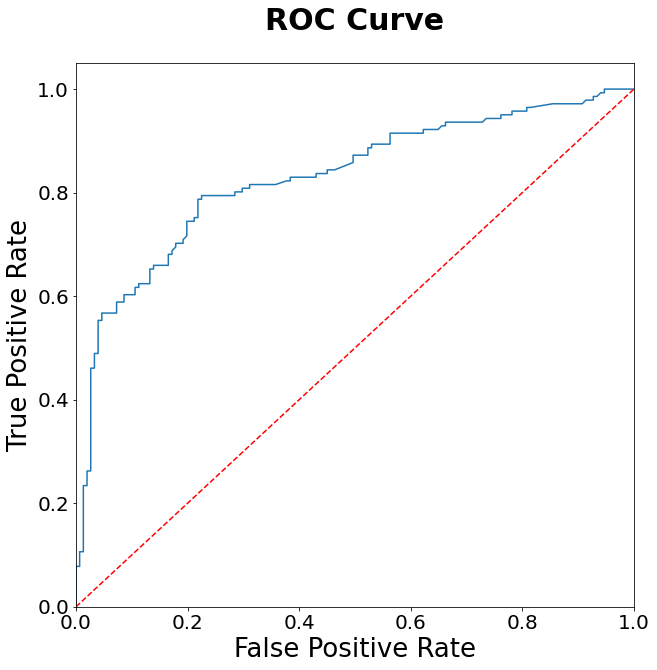

In [10]:
fp_rate, tp_rate, lim = roc_curve(y_test, model_log.predict_proba(X_test)[:,1])

plt.rcParams["figure.figsize"]=(10,10)
plt.plot(fp_rate,tp_rate, label='area = %0.2f'% model_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize=26)
plt.ylabel('True Positive Rate', fontsize=26)
plt.title('ROC Curve', fontsize=30, y=1.05, weight='bold')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

For a comprehensive model evaluation, we conducted Repeated K-Fold Cross-Validation and estimated key metrics, including accuracy, precision, recall, and F1-score, with the following results:

In [11]:
cross_val = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(model_log, X, y, scoring='accuracy', cv=cross_val, n_jobs=-1)
print('Accuracy: mean: %.3f std: %.3f' % (np.mean(scores), np.std(scores)))

Accuracy: mean: 0.752 std: 0.040


In [12]:
cross_val = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores_accuracy = cross_val_score(model_log, X, y, scoring = 'accuracy', cv=cross_val, n_jobs=-1)
scores_precision = cross_val_score(model_log, X, y, scoring = 'precision', cv=cross_val, n_jobs=-1)
scores_recall = cross_val_score(model_log, X, y, scoring = 'recall', cv=cross_val, n_jobs=-1)
scores_f1_score = cross_val_score(model_log, X, y, scoring = 'f1', cv=cross_val, n_jobs=-1)
print(f"Achieved mean accuracy of {np.mean(scores_accuracy):.4f} with std of {np.std(scores_accuracy):.4f}.")
print(f"Achieved mean precision of {np.mean(scores_precision):.4f} with std of {np.std(scores_precision):.4f}.")
print(f"Achieved mean recall of {np.mean(scores_recall):.4f} with std of {np.std(scores_recall):.4f}.")
print(f"Achieved mean f1-score of {np.mean(scores_f1_score):.4f} with std of {np.std(scores_f1_score):.4f}.")

Achieved mean accuracy of 0.7518 with std of 0.0401.
Achieved mean precision of 0.7609 with std of 0.0590.
Achieved mean recall of 0.7362 with std of 0.0594.
Achieved mean f1-score of 0.7463 with std of 0.0450.


The model accurately classifies approximately 75.18% of the observations with a precision rate of 76.09%.